In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

playerDF = pd.read_csv('/content/drive/MyDrive/players.csv',header=None)


playerDF.rename(columns={ playerDF.columns[1]: "ShotsByP1" }, inplace = True)
playerDF.rename(columns={ playerDF.columns[2]: "ShotsByP2" }, inplace = True)
playerDF.rename(columns={ playerDF.columns[3]: "ShotsByP3" }, inplace = True)

playerDF.head()

,0,ShotsByP1,ShotsByP2,ShotsByP3
0,1,12,13,9
1,2,9,3,15
2,3,18,10,26
3,4,24,3,26
4,5,10,2,35


# 1.1 Plotting the Data


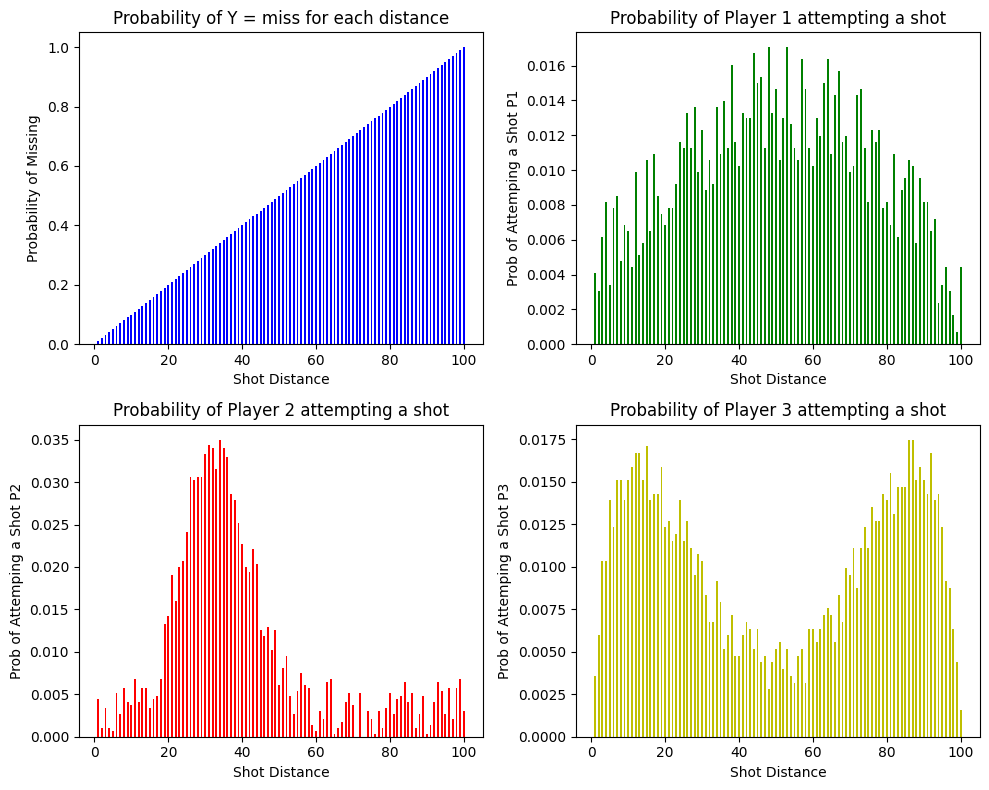

In [ ]:
#calculating the probability of missing according to the distance x
def probabilityOfMissing(x):
  return x/100

num_list = list(range(1, 101))

probMissing = []


#calculating total number of shots for each player
totalShotsP1= playerDF["ShotsByP1"].sum()
totalShotsP2= playerDF["ShotsByP2"].sum()
totalShotsP3= playerDF["ShotsByP3"].sum()

probShootingP1 = []
probShootingP2 = []
probShootingP3 = []

#a function to calculate the attempted amount of shots for each player
def probabilityOfShot(x,total):
  return x/total


for i in num_list:
  probMissing.append(probabilityOfMissing(i))
  probShootingP1.append(probabilityOfShot(playerDF["ShotsByP1"].iloc[i-1],totalShotsP1))
  probShootingP2.append(probabilityOfShot(playerDF["ShotsByP2"].iloc[i-1],totalShotsP2))
  probShootingP3.append(probabilityOfShot(playerDF["ShotsByP3"].iloc[i-1],totalShotsP3))


#Plot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].bar(num_list, probMissing, color='b', width=0.5)
axes[0, 0].set_title('Probability of Y = miss for each distance')
axes[0, 0].set_xlabel('Shot Distance')
axes[0, 0].set_ylabel('Probability of Missing')

axes[0, 1].bar(num_list, probShootingP1, color='g', width=0.5)
axes[0, 1].set_title('Probability of Player 1 attempting a shot')
axes[0, 1].set_xlabel('Shot Distance')
axes[0, 1].set_ylabel('Prob of Attemping a Shot P1')

axes[1, 0].bar(num_list, probShootingP2, color='r', width=0.5)
axes[1, 0].set_title('Probability of Player 2 attempting a shot')
axes[1, 0].set_xlabel('Shot Distance')
axes[1, 0].set_ylabel('Prob of Attemping a Shot P2')

axes[1, 1].bar(num_list, probShootingP3, color='y', width=0.5)
axes[1, 1].set_title('Probability of Player 3 attempting a shot')
axes[1, 1].set_xlabel('Shot Distance')
axes[1, 1].set_ylabel('Prob of Attemping a Shot P3')


# Adjust layout for better spacing
plt.tight_layout()

'''
plt.bar(num_list,probMissing)

plt.xlabel("Shot Distance")
plt.ylabel("Probability of Missing")

plt.bar(num_list,probShootingP1)
plt.bar(num_list,probShootingP2)
plt.bar(num_list,probShootingP3)
'''

plt.show()

# 1.2 Calculating the Likelihood

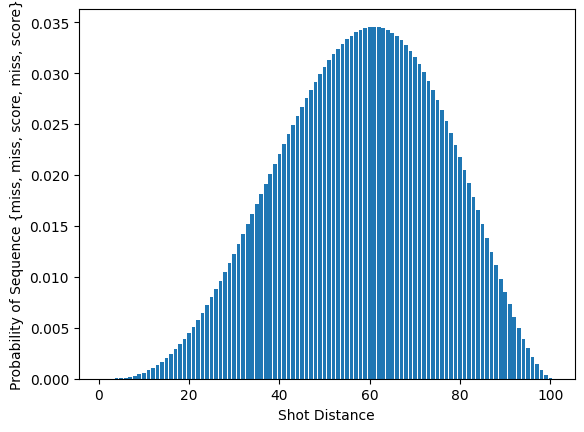

In [ ]:
listSequence = []

for i in num_list:
  probSequence = (probabilityOfMissing(i-1)**3) * ((1 - probabilityOfMissing(i-1))**2)
  listSequence.append(probSequence)


plt.bar(num_list,listSequence)

plt.xlabel("Shot Distance")
plt.ylabel("Probability of Sequence {miss, miss, score, miss, score}")

plt.show()

# 1.4 Number of Observation and the Posterior

In [ ]:
#To calculate the probability of scoring a shot with regard to distance, we will use the missing information we have
def probabilityOfScoring(x):
  return 1-x

probScoring= []

for i in num_list:
  probScoring.append(probabilityOfScoring(probMissing[i-1]))

#probability of scoring a shot with regard to distance:
print(probScoring)

[0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.9299999999999999, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.8200000000000001, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7, 0.69, 0.6799999999999999, 0.6699999999999999, 0.6599999999999999, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6, 0.5900000000000001, 0.5800000000000001, 0.5700000000000001, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5, 0.49, 0.48, 0.47, 0.45999999999999996, 0.44999999999999996, 0.43999999999999995, 0.43000000000000005, 0.42000000000000004, 0.41000000000000003, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.33999999999999997, 0.32999999999999996, 0.31999999999999995, 0.31000000000000005, 0.30000000000000004, 0.29000000000000004, 0.28, 0.27, 0.26, 0.25, 0.24, 0.22999999999999998, 0.21999999999999997, 0.20999999999999996, 0.19999999999999996, 0.18999999999999995, 0.18000000000000005, 0.17000000000000004, 0.16000000000000003, 0.15000000000000002, 0.14, 0.13, 0.12, 0.10999999999999999, 0.09999999999999998, 0.089999

# 1. The Player 1 attempts a shot from d, and he scores.

P( Player1 shoots from distance d | y = score) = P(y=score | Player1 shoots from distance d) * P(Player1 shoots from distance d) / P(y=score)

 P(y=score) = P(y=score|d)*P(d) + P(y=score| not d)*P(not d)

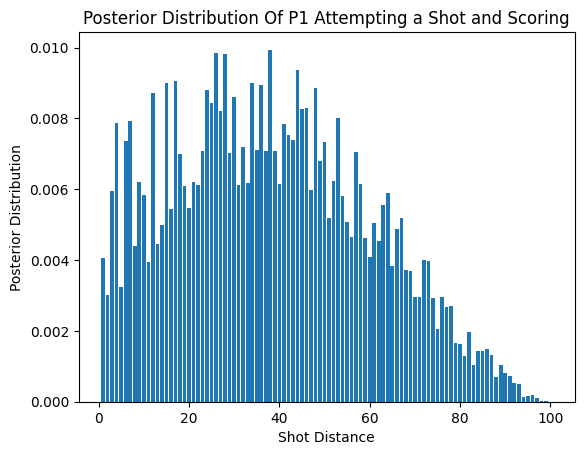

In [ ]:
posteriorP1 = []

for i in num_list:
  posteriorP1.append( probScoring[i-1] * probShootingP1[i-1] )

plt.bar(num_list,posteriorP1)

plt.title("Posterior Distribution Of P1 Attempting a Shot and Scoring")
plt.xlabel("Shot Distance")
plt.ylabel("Posterior Distribution")

plt.show()



# 2. The Player 1 attempts 3 shots from d, and he scores all of them.

P( d | y = score,score,score) = P(y=score,score,score | d) * P(d) / P(y=score,score,score)

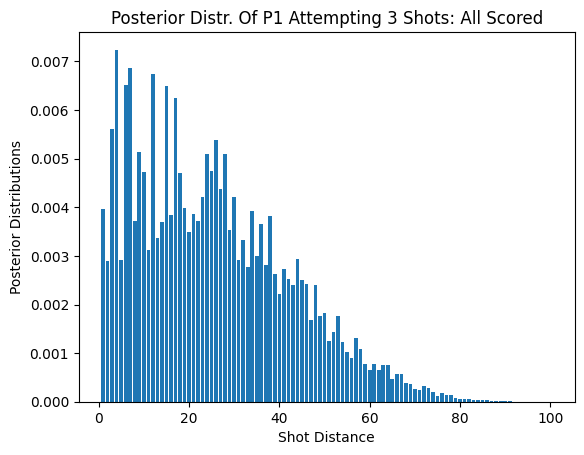

In [ ]:
posteriorP1_3Shots = []
for i in num_list:
  posteriorP1_3Shots.append( probScoring[i-1] **3 * probShootingP1[i-1])

plt.bar(num_list, posteriorP1_3Shots)

plt.title("Posterior Distr. Of P1 Attempting 3 Shots: All Scored")
plt.xlabel("Shot Distance")
plt.ylabel("Posterior Distributions")

plt.show()


# 3. The Player 1 attempts 5 shots from d, and he scores 2 of them and misses 3 of them.



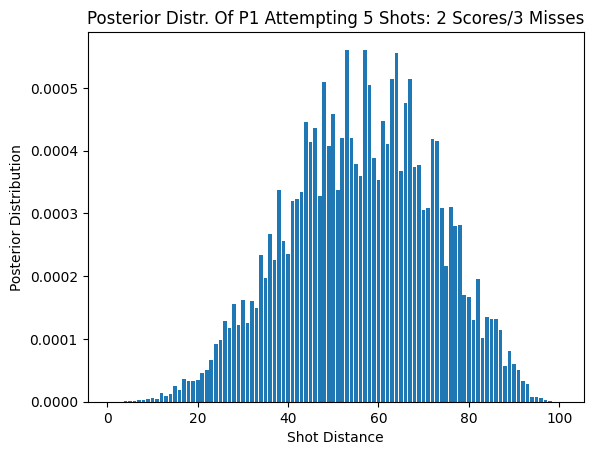

In [ ]:
posteriorP1_5Shots = []
for i in num_list:
  posteriorP1_5Shots.append( probScoring[i-1] **2 * (probabilityOfMissing(i))**3 * probShootingP1[i-1])

plt.bar(num_list, posteriorP1_5Shots)

plt.title("Posterior Distr. Of P1 Attempting 5 Shots: 2 Scores/3 Misses")
plt.xlabel("Shot Distance")
plt.ylabel("Posterior Distribution")

plt.show()


# 4. The Player 1 attempts 40 shots from d, and he scores 15 of them and misses 25 of them.

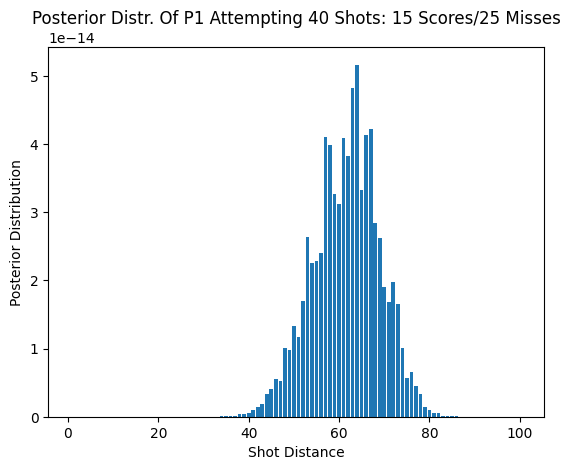

In [ ]:
posteriorP1_40Shots = []
for i in num_list:
  posteriorP1_40Shots.append( (probScoring[i-1] ** 15) * ((probabilityOfMissing(i))**25) * probShootingP1[i-1])

plt.bar(num_list, posteriorP1_40Shots)

plt.title("Posterior Distr. Of P1 Attempting 40 Shots: 15 Scores/25 Misses")
plt.xlabel("Shot Distance")
plt.ylabel("Posterior Distribution")

plt.show()


According to the plot, the distance should be something in between [60,65]. I believe (after checking the data.csv), it could be d=64

# 1.5 Marginalization

# 1. Given the outcome of shots, plot the posterior distribution over different distances.

P(d | Y=8 miss,2 score) = P(Y=8 miss,2 score | d) * P(d) / P(Y=8 miss,2score)

P(Y=8 miss,2score) = P(Y=8 miss,2score | d) * P(d) + P(Y=8 miss,2score | not d) * P(not d)


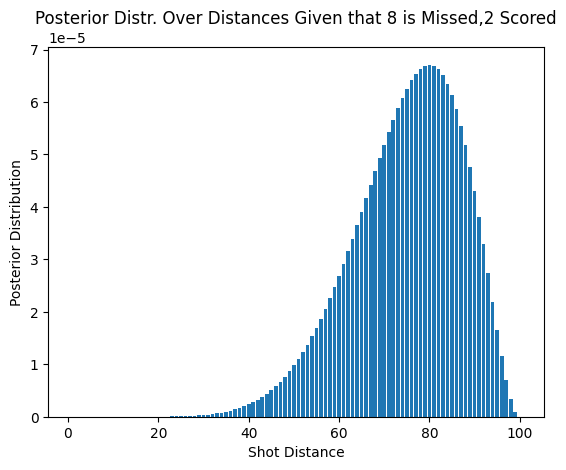

In [ ]:
marginalization = []
for i in num_list:
  marginalization.append( (probScoring[i-1] ** 2) * (probMissing[i-1]**8) * 0.01)

plt.bar(num_list, marginalization)

plt.title("Posterior Distr. Over Distances Given that 8 is Missed,2 Scored")
plt.xlabel("Shot Distance")
plt.ylabel("Posterior Distribution")

plt.show()

In [ ]:
maxVal = max(marginalization)
index = marginalization.index(maxVal)
print(index)

79


# 2. Given the outcome of shots, plot the posterior distribution over different players.

P( B | Y=8 miss,2 score) = P(Y=8miss,2score|B)*P(B) / P(Y=8 miss,2 score)


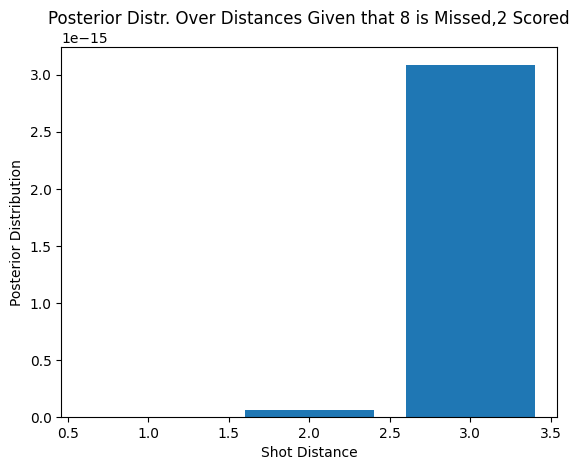

In [ ]:
probOfPlayerChosen =[ 0.25,0.25,0.5]

marginalizationPlayer = []
for i in range(1,4,1):
  marginalizationPlayer.append((probScoring[i-1] ** 2) * (probMissing[i-1]**8) * 0.01 * probOfPlayerChosen[i-1])

plt.bar(range(1,4,1), marginalizationPlayer)

plt.title("Posterior Distr. Over Different Players Given that 8 is Missed,2 Scored")
plt.xlabel("Shot Distance")
plt.ylabel("Posterior Distribution")

plt.show()

**3. Which distance has the largest posterior?**

The distance 79 has the largest posterior

**4. Which player has the largest posterior?**

Player 3 has the largest posterior